# 使用 Seaborn 进行可视化

## Seaborn vs Matplotlib

下面是Matplotlib中一个简单的随机漫步图的示例，使用了其经典的图格式和颜色。  
我们从典型的导入开始:

In [3]:
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

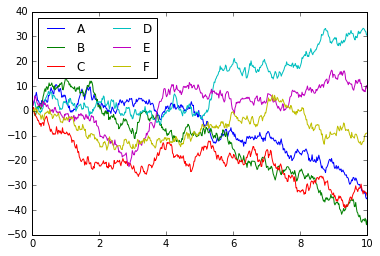

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

尽管结果包含了我们希望它传达的所有信息，但它传达信息的方式并不那么美观，甚至在21世纪的数据可视化环境中看起来有点过时。  
现在让我们看看它是如何与Seaborn一起工作的。  
正如我们将看到的，Seaborn有许多自己的高级绘图例程，但它也可以覆盖Matplotlib的默认参数，进而获得简单的Matplotlib脚本，从而产生非常出色的输出。  
我们可以通过调用Seaborn的' ' set() ' '方法来设置样式。  
按照惯例，Seaborn被导入为“sns”:  

In [4]:
import seaborn as sns

sns.set()

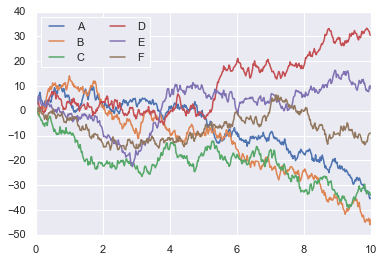

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## 使用 Seaborn 绘图

Seaborn的主要思想是，它提供高级命令来创建各种用于统计数据探索甚至一些统计模型拟合的绘图类型。  
让我们看一下Seaborn中可用的一些数据集和绘图类型。请注意，以下所有*都可以*使用原始的Matplotlib命令来完成(实际上，这是Seaborn在底层所做的)，但是Seaborn API要方便得多。按照惯例，Seaborn被导入为“sns”:  

### Histograms 和 KDE

通常在统计数据可视化中，你想要的就是绘制直方图和变量的联合分布。  
我们已经看到在Matplotlib中这是相对简单的: 

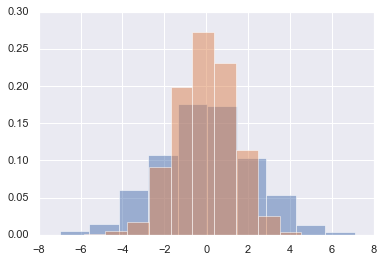

In [10]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

除了直方图，我们可以使用核密度估计得到一个平滑的分布曲线，sns. kdeploy 

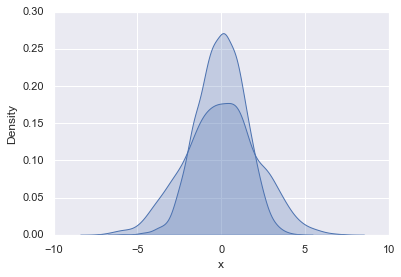

In [11]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

### Pair plots

当你将联合图推广到更大维度的数据集时，你最终得到的是*对图*。当您想要绘制所有值对时，这对于探索多维数据之间的相关性非常有用。  
我们将使用众所周知的Iris数据集来演示这一点，该数据集列出了三种鸢尾的花瓣和萼片的测量值:  

In [20]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


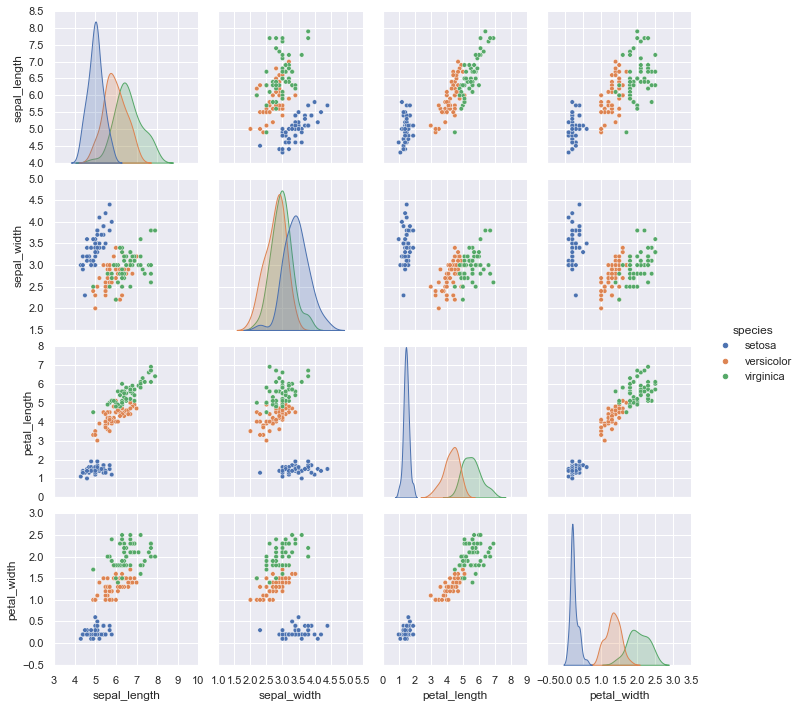

In [22]:
sns.pairplot(iris, hue='species', height=2.5);

### Bar plots  

时序数据可以使用 bar plots 绘制

In [24]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


D:\anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


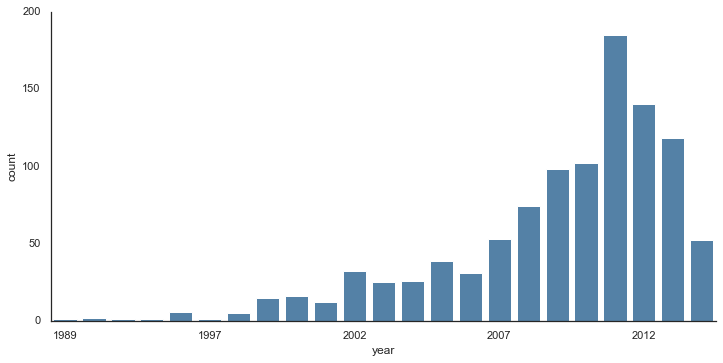

In [32]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=5)

D:\anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


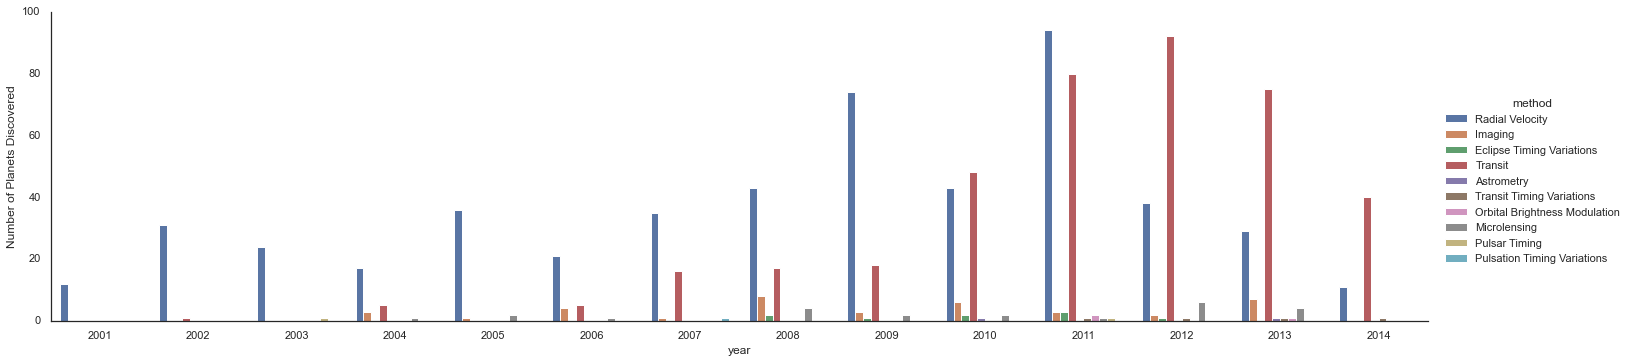

In [31]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')